In [1]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [61]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['Gender'] = data['Gender'] - 1
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,1.0,14,4,7,0.0,YA,9.0,...,87,30.0,16,70,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,1.0,12,3,3,0.0,YA,10.0,...,83,26.0,16,69,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,0.0,12,3,0,0.0,YA,7.0,...,76,28.0,15,61,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,0.0,12,4,0,0.0,YA,9.0,...,97,28.0,16,77,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,0.0,12,6,0,0.0,YA,8.0,...,82,28.0,15,62,17.0,9.0,18.0,14.0,12.0,11.0
5,106,Original,18.0,0.0,12,4,0,0.0,YA,12.0,...,77,26.0,14,70,15.0,17.0,8.0,13.0,10.0,12.0
6,107,Annotated,18.0,1.0,12,4,1,0.0,YA,10.0,...,87,23.0,16,62,20.0,12.0,12.0,13.0,6.0,15.0
7,108,Video,18.0,1.0,12,5,0,0.0,YA,6.0,...,76,22.0,15,63,16.0,13.0,13.0,15.0,14.0,11.0
8,109,Original,18.0,1.0,13,5,2,0.0,YA,9.0,...,95,34.0,16,86,20.0,12.0,12.0,8.0,8.0,12.0
9,110,Annotated,19.0,0.0,12,4,0,0.0,YA,10.0,...,78,28.0,14,70,15.0,13.0,10.0,12.0,7.0,10.0


In [69]:
df = pd.DataFrame(data.groupby(['AgeGroup','Condition']).count()['sub']);df

sub
AgeGroup Condition     
OA       Annotated    7
         Original     6
         Video        6
YA       Annotated   17
         Original    19
         Video       19

In [70]:
df = df.merge(
    pd.DataFrame(data.groupby(['AgeGroup','Condition']).mean()['Age']),
    on=['AgeGroup','Condition']
);df

sub        Age
AgeGroup Condition                
OA       Annotated    7  71.000000
         Original     6  72.500000
         Video        6  74.333333
YA       Annotated   17  20.176471
         Original    19  18.722222
         Video       19  20.842105

In [71]:
df = df.merge(
    pd.DataFrame(data.groupby(['AgeGroup','Condition']).mean()['Gender']),
    on=['AgeGroup','Condition']
);df

sub        Age    Gender
AgeGroup Condition                          
OA       Annotated    7  71.000000  0.571429
         Original     6  72.500000  0.833333
         Video        6  74.333333  0.833333
YA       Annotated   17  20.176471  0.764706
         Original    19  18.722222  0.473684
         Video       19  20.842105  0.631579

In [72]:
df = df.merge(
    pd.DataFrame(data.groupby(['AgeGroup','Condition']).mean()['comp_change']),
    on=['AgeGroup','Condition']
);df

sub        Age    Gender  comp_change
AgeGroup Condition                                       
OA       Annotated    7  71.000000  0.571429     1.571429
         Original     6  72.500000  0.833333     3.666667
         Video        6  74.333333  0.833333     4.166667
YA       Annotated   17  20.176471  0.764706     2.411765
         Original    19  18.722222  0.473684     3.894737
         Video       19  20.842105  0.631579     3.842105

In [73]:
df = df.merge(
    pd.DataFrame(data.groupby(['AgeGroup','Condition']).mean()['comp_t1']),
    on=['AgeGroup','Condition']
);df

sub        Age    Gender  comp_change    comp_t1
AgeGroup Condition                                                  
OA       Annotated    7  71.000000  0.571429     1.571429  12.571429
         Original     6  72.500000  0.833333     3.666667  11.166667
         Video        6  74.333333  0.833333     4.166667  10.166667
YA       Annotated   17  20.176471  0.764706     2.411765  10.117647
         Original    19  18.722222  0.473684     3.894737   9.736842
         Video       19  20.842105  0.631579     3.842105   9.631579

In [75]:
df = df.merge(
    pd.DataFrame(data.groupby(['AgeGroup','Condition']).mean()['comp_t2']),
    on=['AgeGroup','Condition']
);df

sub        Age    Gender  comp_change    comp_t1  \
AgeGroup Condition                                                     
OA       Annotated    7  71.000000  0.571429     1.571429  12.571429   
         Original     6  72.500000  0.833333     3.666667  11.166667   
         Video        6  74.333333  0.833333     4.166667  10.166667   
YA       Annotated   17  20.176471  0.764706     2.411765  10.117647   
         Original    19  18.722222  0.473684     3.894737   9.736842   
         Video       19  20.842105  0.631579     3.842105   9.631579   

                    comp_t2_x  comp_t2_y  
AgeGroup Condition                        
OA       Annotated  14.142857  14.142857  
         Original   14.833333  14.833333  
         Video      14.333333  14.333333  
YA       Annotated  12.529412  12.529412  
         Original   13.631579  13.631579  
         Video      13.473684  13.473684

# Group comparisons

In [76]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [77]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations

### Comprehension Change -> everything
#### Pearson r

In [78]:
data=data.dropna()

In [79]:
corr_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        corr_df.loc[c,d] = sp.pearsonr(data[c],data[d])[0]
corr_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,1.000000,0.528276,-0.513443,0.209224,0.271127,-0.056430,0.258703,0.155031,0.298560,0.047267,0.217452
comp_t2,0.528276,1.000000,0.457370,0.100089,0.226654,-0.391362,0.296953,0.134598,0.251954,-0.018091,0.345010
comp_change,-0.513443,0.457370,1.000000,-0.117975,-0.054895,-0.336432,0.029166,-0.026339,-0.058057,-0.067789,0.120939
nb_CoR,0.209224,0.100089,-0.117975,1.000000,-0.203059,-0.197166,0.032543,0.038751,-0.114130,-0.015367,-0.184608
nb_RT,0.271127,0.226654,-0.054895,-0.203059,1.000000,0.047254,0.308242,0.137331,0.202917,-0.007786,0.282853
procspd_RT,-0.056430,-0.391362,-0.336432,-0.197166,0.047254,1.000000,-0.112890,-0.059422,0.117254,-0.000884,-0.059604
NFCS_sum,0.258703,0.296953,0.029166,0.032543,0.308242,-0.112890,1.000000,0.382216,0.357837,0.137134,0.638078
TSSI_sum,0.155031,0.134598,-0.026339,0.038751,0.137331,-0.059422,0.382216,1.000000,0.244699,0.177116,0.559871
vocab_sum,0.298560,0.251954,-0.058057,-0.114130,0.202917,0.117254,0.357837,0.244699,1.000000,0.487212,0.512574
SciLit_sum,0.047267,-0.018091,-0.067789,-0.015367,-0.007786,-0.000884,0.137134,0.177116,0.487212,1.000000,0.129770


In [80]:
sig_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        sig_df.loc[c,d] = sp.pearsonr(data[c],data[d])[1]
sig_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,0.000000,0.000004,0.000009,0.089280,0.026469,0.650140,3.452763e-02,2.103170e-01,0.014124,0.704073,7.712032e-02
comp_t2,0.000004,0.000000,0.000100,0.420316,0.065123,0.001057,1.467742e-02,2.775002e-01,0.039702,0.884470,4.246593e-03
comp_change,0.000009,0.000100,0.000000,0.341696,0.659059,0.005375,8.147591e-01,8.324407e-01,0.640737,0.585712,3.296175e-01
nb_CoR,0.089280,0.420316,0.341696,0.000000,0.099343,0.109766,7.937608e-01,7.555447e-01,0.357769,0.901774,1.347751e-01
nb_RT,0.026469,0.065123,0.659059,0.099343,0.000000,0.704149,1.115824e-02,2.677733e-01,0.099585,0.950140,2.038074e-02
procspd_RT,0.650140,0.001057,0.005375,0.109766,0.704149,0.000000,3.630493e-01,6.328936e-01,0.344673,0.994337,6.318476e-01
NFCS_sum,0.034528,0.014677,0.814759,0.793761,0.011158,0.363049,0.000000e+00,1.413776e-03,0.002949,0.268466,6.321423e-09
TSSI_sum,0.210317,0.277500,0.832441,0.755545,0.267773,0.632894,1.413776e-03,0.000000e+00,0.045966,0.151618,8.399396e-07
vocab_sum,0.014124,0.039702,0.640737,0.357769,0.099585,0.344673,2.948862e-03,4.596578e-02,0.000000,0.000029,9.230746e-06
SciLit_sum,0.704073,0.884470,0.585712,0.901774,0.950140,0.994337,2.684658e-01,1.516175e-01,0.000029,0.000000,2.952593e-01


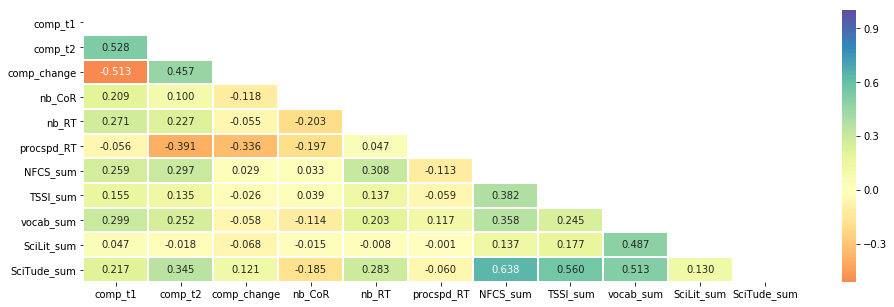

In [81]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='Spectral',
            fmt='.3f', linewidths=1, center=0
           ).get_figure().savefig('correlations.png')

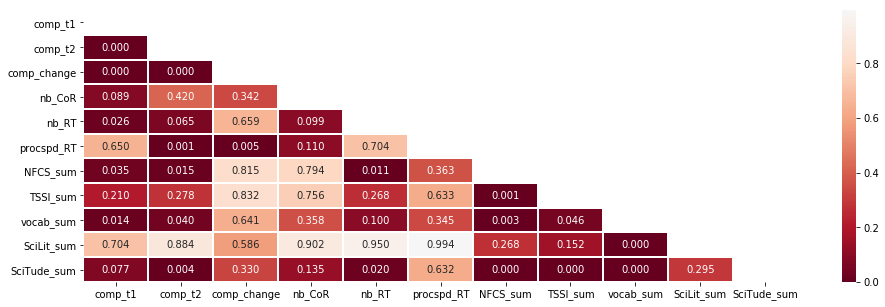

In [82]:
mask = np.zeros_like(sig_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(sig_df, mask=mask, annot=True, cmap='RdBu',
            fmt='.3f', linewidths=1, center=1
           ).get_figure().savefig('significance.png')

## All figures - Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


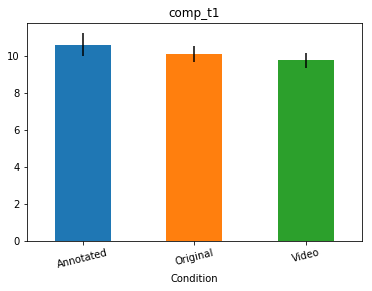

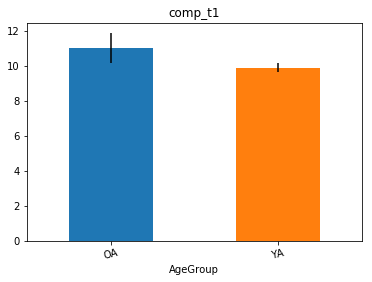

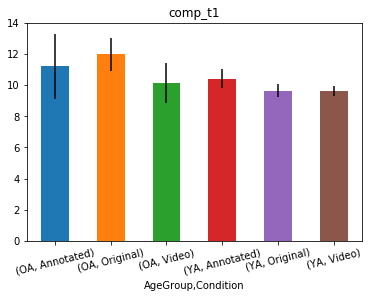

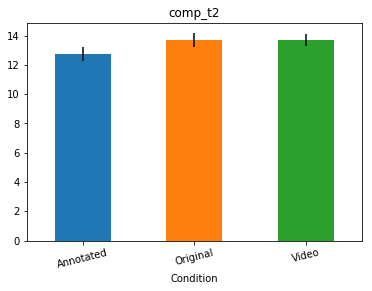

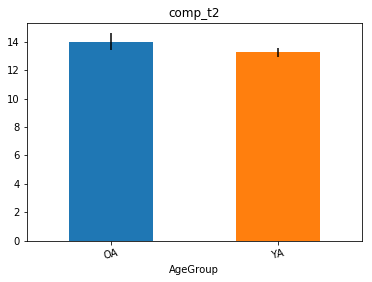

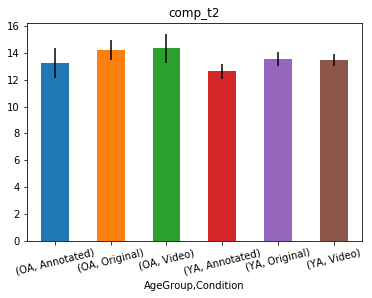

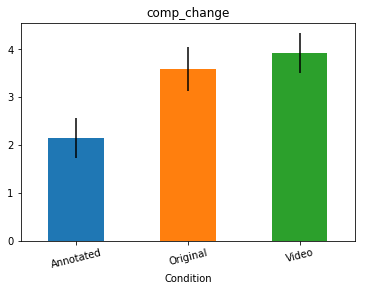

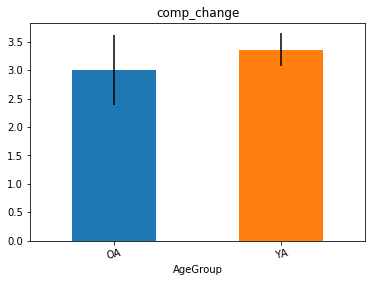

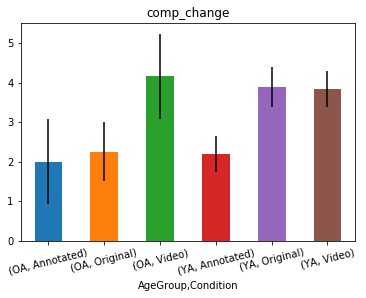

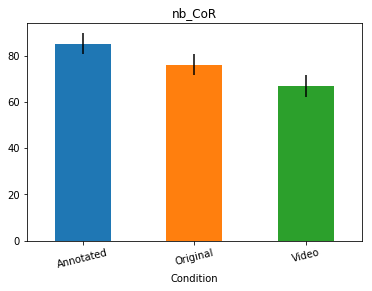

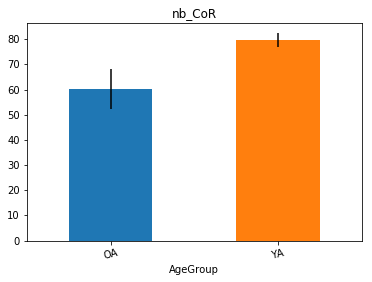

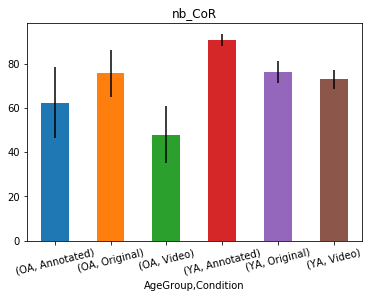

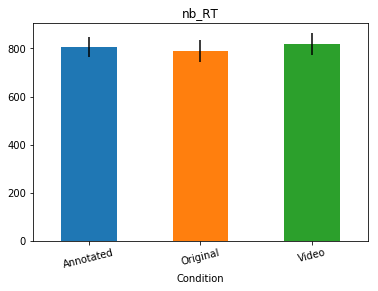

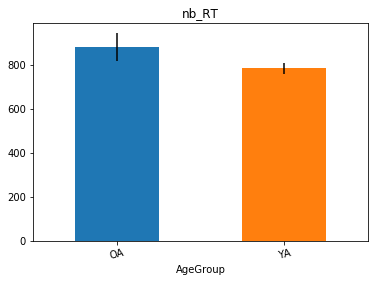

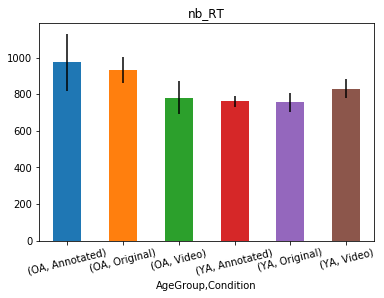

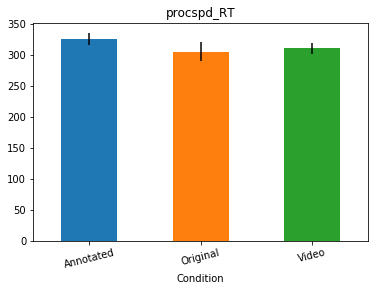

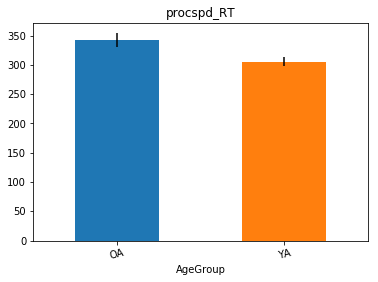

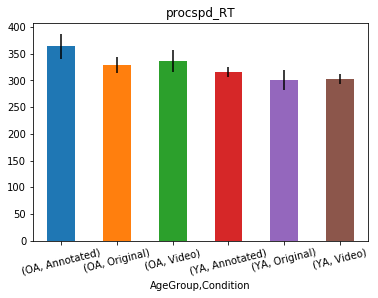

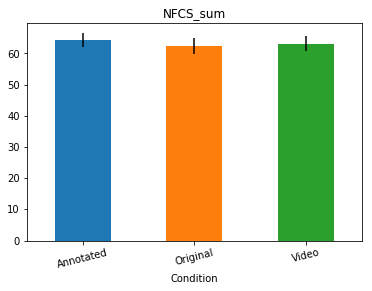

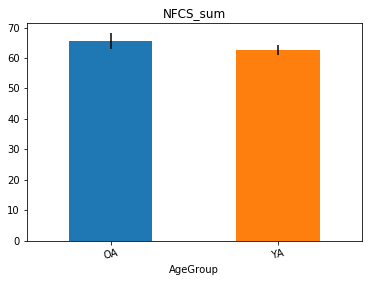

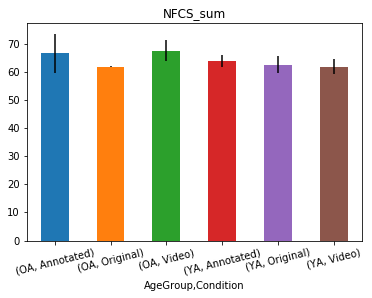

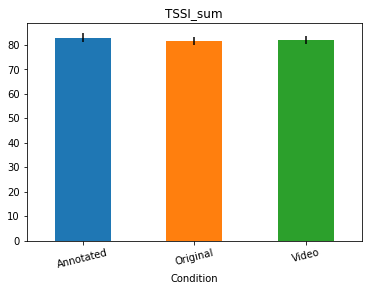

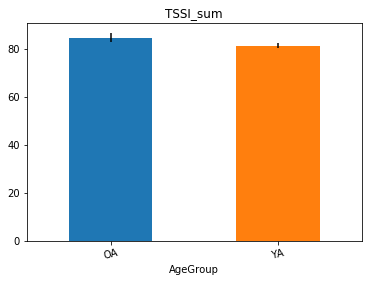

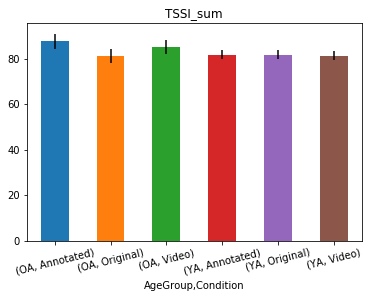

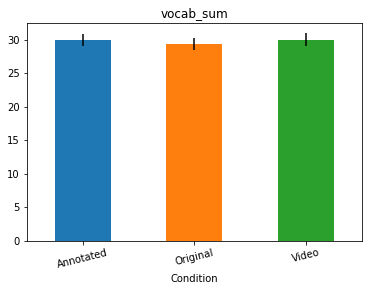

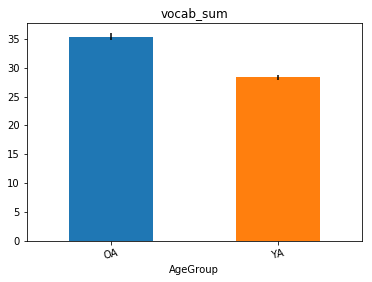

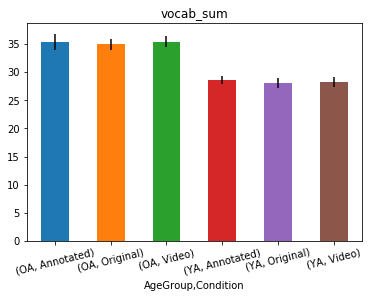

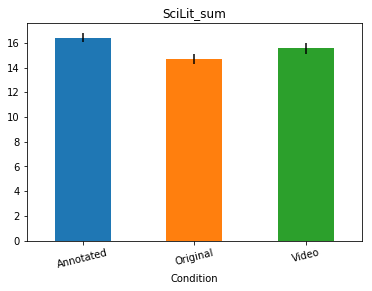

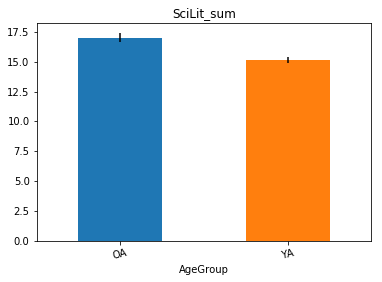

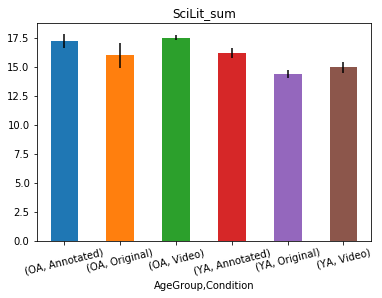

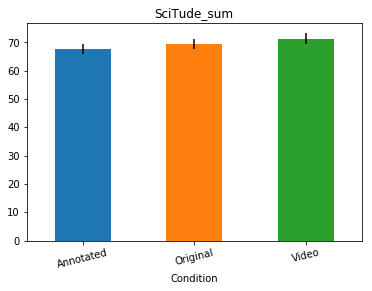

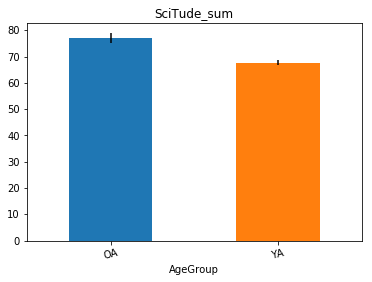

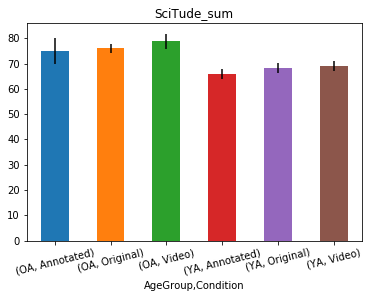

In [83]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = data.groupby(grp).mean()
        sem = data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath)

## Figure generation - Swarm, Strip, and Box plots

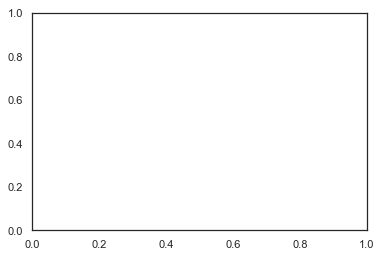

In [84]:
sns.set(style='white')
for var in vars_of_interest:
    for grp in grps_of_interest:
        df = data.set_index(grp)
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'_swarm.png')
        ax = sns.swarmplot(x=var,y=df.index,data=df)
        ax.get_figure().savefig(fpath)
        ax.clear()